In [1]:
from gdeep.topactivation import TopactivationFC as TFC
from gdeep.pipeline import Pipeline
from torch.utils.tensorboard import SummaryWriter

from gdeep.models import FFNet
from torch import nn
import torch
from gdeep.data import TorchDataLoader
from tqdm import tqdm 

!pip3 install xitorch
from gdeep.models import ModelExtractor
from gdeep.topactivation.spectral_analysisTorch import LaplacianOperator
import matplotlib.pyplot as plt 

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Using GPU!")
else:
    DEVICE = torch.device("cpu")


def print28x28tensor(tensor):
    img=tensor.to('cpu')
    pixels = img.reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    
    
from gdeep.topactivation.svr import SVR


import numpy as np 
def printFilters(f):
    """ f has shape channel,3,3"""
    c = f.shape[0]
    w = int(np.sqrt(c))
    h = c//w
    #print(h,w,c)
    res = torch.zeros(4*(w),4*(h) ) 
    for i in range(w):
        for j in range(h):
            basei = 4*i
            basej = 4*j
            res[basei:basei+3,basej:basej+3]=f[i+w*j,:,:]
    plt.imshow(res)

Using GPU!
Using GPU!
Using GPU!
No TPUs...
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/home/linuxbrew/.linuxbrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Using GPU!


# BERT

from transformers import BertTokenizer,BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

dico = model.state_dict()

dico = model.state_dict()
names = ['encoder.layer.11.attention.self.query.weight' ,
         'encoder.layer.11.attention.self.key.weight' ,
         'encoder.layer.11.attention.self.value.weight',
         'encoder.layer.11.attention.output.dense.weight',
         'encoder.layer.11.intermediate.dense.weight',
         'encoder.layer.11.output.dense.weight']
         
         
weights = []
for a in names:
    weights.append(dico[a])
    
svr = SVR(weights)

plt.scatter(svr.S[0],svr.S[1][:len(svr.S[0])])

# Resnet 

In [18]:


import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18',pretrained=True)

import cProfile
weights= [ w.detach().to(DEVICE) for w in model.parameters() if w.shape[-1]!=1]
# Removing the tensor with kernel dimension 1 is a trick to remove the 
# skip connections which do have weights attached (those that skip between
# spaces of different dimensions)


for w in weights:
    if len(w.shape)>1:
        print(w.shape)
        
svr = SVR(weights,method='svr',max_modes=50)


Using cache found in /home/meller/.cache/torch/hub/pytorch_vision_v0.10.0


torch.Size([64, 3, 7, 7])
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
torch.Size([128, 64, 3, 3])
torch.Size([128, 128, 3, 3])
torch.Size([128, 128, 3, 3])
torch.Size([128, 128, 3, 3])
torch.Size([256, 128, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([512, 256, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([1000, 512])


100%|███████████████████████████████████████████| 18/18 [00:02<00:00,  7.64it/s]


# VGG 

In [20]:


import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16',pretrained=True)

import cProfile
weights= [ w.detach().to(DEVICE) for w in model.parameters() ]


for w in weights:
    if len(w.shape)>1:
        print(w.shape)
        
svr = SVR(weights,method='svr',max_modes=50)


Using cache found in /home/meller/.cache/torch/hub/pytorch_vision_v0.10.0


torch.Size([64, 3, 3, 3])
torch.Size([64, 64, 3, 3])
torch.Size([128, 64, 3, 3])
torch.Size([128, 128, 3, 3])
torch.Size([256, 128, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([512, 256, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([4096, 25088])
torch.Size([4096, 4096])
torch.Size([1000, 4096])


100%|███████████████████████████████████████████| 16/16 [00:12<00:00,  1.26it/s]


In [21]:
svr.plot(sigmaThreshold = 3,max_edges=30)

100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 17.63it/s]


In [6]:
cosvr = SVR(weights,method='cosvr',max_modes=50)
cosvr.plot(sigmaThreshold = 3,max_edges=50)

100%|███████████████████████████████████████████| 18/18 [00:01<00:00, 14.18it/s]


In [5]:
layer =3
# Rotations
adja = svr.U[layer].T@cosvr.V[layer+1]
plt.imshow(torch.abs(adja[-50:,-50:]))

NameError: name 'cosvr' is not defined

For layer = 3 the agreement for the lowest singular value is somewhat strange, it corresponds to a Dirac on a node channel 

tensor(102)


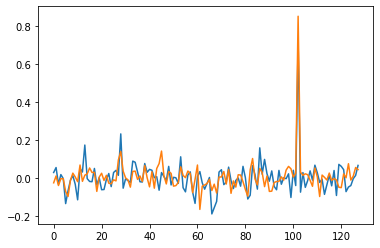

In [7]:
layer = 2
idx = -1
plt.plot(svr.U[layer][:,idx])
plt.plot(cosvr.V[layer+1][:,idx])
print(svr.U[layer][:,idx].argmax())

In [87]:
print(svr.V[layer].shape)

torch.Size([128, 3, 3, 128])


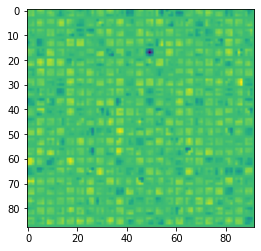

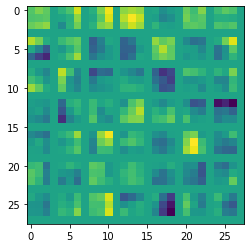

In [38]:
layer = 11
nchannel=0
filters = svr.V[layer]

svr.plot_filters(-(filters[:,:,:,0]) )
svr.plot_filters(-(filters[0,:,:,:].transpose(0,-1)) )

torch.Size([50, 50, 3, 3])


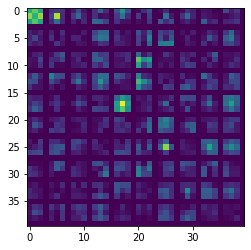

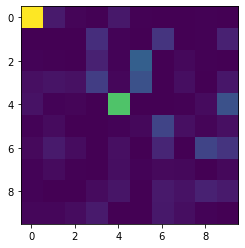

In [40]:
#Effective filters 
layer = 7
filters = svr.filters(layer)
filters = filters.permute(0,3,1,2)
print(filters.shape)
size = 10
svr.plot_filters(torch.abs(filters)[:size,:size])
plt.imshow(svr.adjacency[layer][:size,:size].T)

## Looking for specific patterns in the adjacency matrix of filters 

In [36]:
kernel = torch.tensor([[-1.,-1.,-1.],[-1.,-1.,-1.],[-1.,-1.,-1.]])
for layer in range(len(svr.arch)-5):
    filters = svr.filters(layer)
    # Attention même avec kernel = 1 on ne retrouve pas la svr 
    svr.adjacency[layer] = torch.einsum('nxym,xy->nm',filters,kernel)**2
    

In [37]:
svr.plot(max_edges=20)

100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 26.53it/s]


## --------------

## Link from superfeature to class prediction 

In [26]:
weights[-2].shape

torch.Size([1000, 4096])

tensor(729)


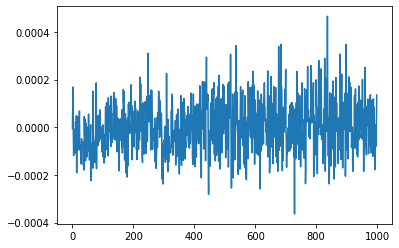

In [41]:
classes = weights[-2].to('cpu')@torch.relu(svr.U[-2][:,0])
plt.plot(classes.numpy())
print(classes.sort(descending=True)[1][-1])

tensor(153.8542)


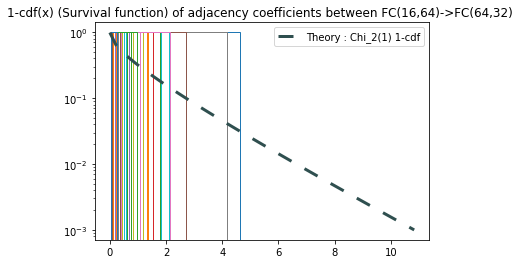

In [136]:
layer = -4
#a = (svr.V[layer+1].T@svr.U[layer][:,-1])**2
a = svr.adjacency[layer][:,-1]
n = 1/svr.adjacency[layer].mean()
print(n)#len(svr.U[-2][:,0])
plt.hist(n*a.numpy(),density=True,bins=100,cumulative=-1,histtype='step')
plt.yscale('log')

from scipy.stats import chi2,norm


x = np.linspace(chi2.ppf(0.01, 1),chi2.ppf(0.999, 1), 50)
plt.plot(x, 1-chi2.cdf(x, 1),linestyle=(0, (5, 5)), lw=3, label='Theory : Chi_2(1) 1-cdf',color='darkslategrey')
plt.legend()
plt.title('1-cdf(x) (Survival function) of adjacency coefficients between FC(16,64)->FC(64,32) ')
plt.show()


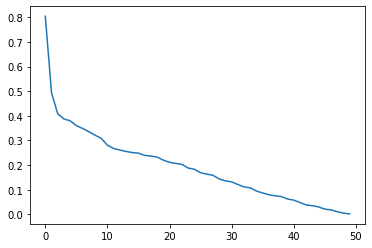

In [127]:
#W=torch.concat((svr.U[-2],svr.V[-1]),dim=1)
_,S,_=torch.svd(svr.adjacency[-2])
plt.plot(S.numpy())

n= 512


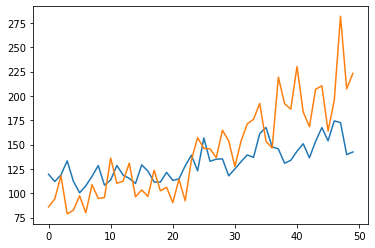

In [122]:
layer = -6
a = svr.adjacency[layer]
print('n=',svr.U[layer].shape[0])
dimx = 1/a.mean(dim=0)
dimy = 1/a.mean(dim=1)
plt.plot(dimy)
plt.plot(dimx)

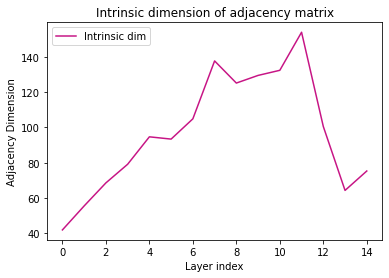

In [134]:
#Intrinsic dimension of the SVR : 
dim = []
for layer in range(len(svr.adjacency)):
    dim.append(1/svr.adjacency[layer].mean())
plt.plot(np.array(dim),color='mediumvioletred',label='Intrinsic dim')
plt.xlabel('Layer index')
plt.ylabel('Adjacency Dimension')
plt.title('Intrinsic dimension of adjacency matrix')
plt.legend()
plt.show()

IndexError: index 2013 is out of bounds for dimension 0 with size 48

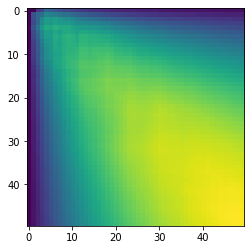

In [125]:
layer = -1
ij = torch.zeros(svr.adjacency[layer].shape)
for i in range(ij.shape[0]):
    for j in range(ij.shape[1]):
        ij[i,j]=((i+1)+(j+1))
        
res = torch.cumsum(svr.adjacency[layer],1).cumsum(0)/ij
plt.imshow(res)
res = res[2:,2:]
xmaxs = res.argmax(dim=1)
xmax = xmaxs[res[xmaxs,:].argmax()]
ymax = res[xmax,:].argmax()
print(xmax.item(),ymax.item())


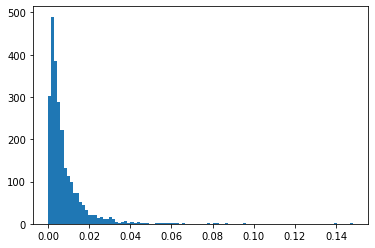

In [18]:
#plt.hist((filters**2).sum(dim=[2,3]).flatten().numpy(),bins=100)
plt.hist(svr.adjacency[layer+1].flatten().numpy(),bins=100)
plt.show()

In [42]:
torch.abs(filters)[1,1]

tensor([[0.0182, 0.0016, 0.0275],
        [0.0291, 0.0010, 0.0158],
        [0.0035, 0.0300, 0.0113]])

In [9]:
svr.V[5].shape

torch.Size([512, 3, 3, 128])

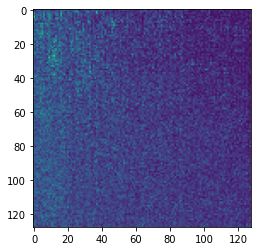

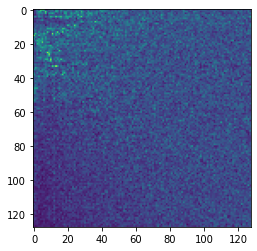

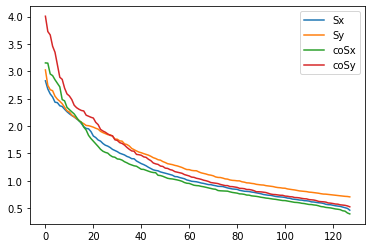

In [65]:
idx = 3
plt.imshow(svr.adjacency[idx ])
plt.show()
plt.imshow(cosvr.adjacency[idx])
plt.show()
plt.plot(svr.S[idx],label='Sx')
plt.plot(svr.S[idx+1],label='Sy')
plt.plot(cosvr.S[idx],label='coSx')
plt.plot(cosvr.S[idx+1],label='coSy')
plt.legend()

torch.Size([512, 3, 3, 128]) torch.Size([512, 3, 3, 128])


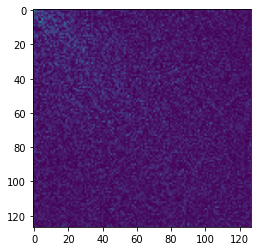

In [57]:
layer = 9
# features 
adja = torch.einsum('xybi,xybj->ij',cosvr.U[layer],svr.V[layer+1])
print(cosvr.U[layer].shape,svr.V[layer+1].shape)
plt.imshow(torch.abs(adja[:-1,:-1]))

In [ ]:
u,s,v = torch.linalg.svd(weights[6].shape

In [ ]:
svr.S[6]

In [ ]:
svr.V[0].shape[0]//9

In [ ]:
bias = []
for w in model.parameters():
    if len(w.shape)==1:
        bias.append(w.detach().cpu())

In [ ]:
plt.plot(bias[10])
bias[10][268]

In [ ]:
plt.imshow(torch.abs(filters)[268:300,:,:,-1].flatten(start_dim=1))

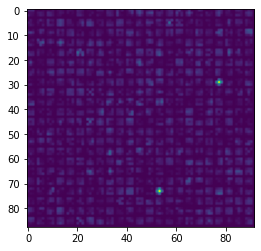

tensor(4.7732)


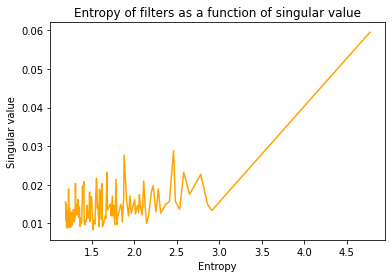

In [107]:
layer = 8
c=0
filters = svr.V[layer]

printFilters(torch.abs(filters[:,:,:,c]) )
plt.show()
print(svr.S[layer][c])
def H(y,dims=[0]):
    x = torch.abs(y)
    return -(x*torch.log(x)).sum(dim=dims)

"""plt.plot(svr.S[layer], H(svr.V[layer].sum(dim=[1,2])),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Entropy')
plt.title('Entropy of filters as a function of singular value')
plt.show()
"""
plt.plot(svr.S[layer], (svr.V[layer]**2).sum(dim=[1,2]).max(dim=0)[0],color='orange')
plt.ylabel('Singular value')
plt.xlabel('Entropy')
plt.title('Entropy of filters as a function of singular value')
plt.show()


# What are the 2 channels incoming the 8th layer

In [104]:
# Finding their index 
fvalue = torch.abs(svr.V[8]).sum(dim=[1,2])[:,0]
print(fvalue.argsort(descending=True)[:2])
fvalue = torch.abs(svr.V[7]).sum(dim=[1,2])[:,0]
print(fvalue.argsort(descending=True)[:2])

tensor([304, 425])
tensor([51, 29])


In [98]:
fvalue.shape

torch.Size([512])

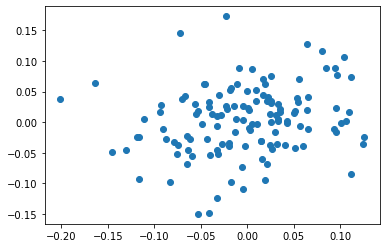

In [106]:
# Plotting the 7th output on this projection 
plt.scatter(svr.U[7][304,:],svr.U[7][425,:])


tensor(1.0000)


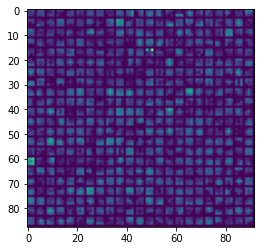

In [84]:
layer = 9
c=0
filters = cosvr.U[layer+1]
print(filters[:,:,:,c].norm())
printFilters(torch.abs(filters[:,:,:,c]) )

In [ ]:
svr.U[layer].shape
plt.imshow(torch.abs(svr.U[layer-1]))

In [ ]:
torch.abs(svr.V[layer]).max(dim=0)[0]

In [ ]:
plt.imshow((svr.adjacency[2])[:100,:100])

In [ ]:
print(weights[0].shape)
print(weights[1].shape)

In [ ]:
1/128

In [ ]:
weightsR = []
for w in weights:
    weightsR.append(torch.randn(w.shape))
svrR = SVR(weightsR)

In [ ]:
len(svr.adjacency)

In [ ]:
k = 14
print(weights[k].shape)
print(weights[k+1].shape)
import numpy as np 
def transform(x):
    return (x)**2
shape = 500
a = transform(svr.adjacency[k][:shape][:shape])
print('a mean : experimental, theory ',"{:e}".format(a.mean().item()),"{:e}".format(1/transform(np.sqrt(svr.arch[k+1]))))
b = transform(svrR.adjacency[k][:shape][:shape])
print('b mean : experimental, theory ',"{:e}".format(b.mean().item()),"{:e}".format(1/transform(np.sqrt(svr.arch[k+1]))))
n = svr.arch[k+1]
print('a std : experimental, theory ',"{:e}".format(a.std().item()),"{:e}".format(np.sqrt(2*(n-2)/((n+2)*n**2))))
print('b std : experimental, theory ',"{:e}".format(b.std().item()),"{:e}".format(np.sqrt(2*(n-2)/((n+2)*n**2))))

plt.hist(a.flatten().numpy(),bins=100,density=True)
#plt.hist(b.flatten().numpy(),bins=100,density=True,alpha=1)

plt.plot([1/transform(np.sqrt(svr.arch[k+1])),1/transform(np.sqrt(svr.arch[k+1]))],[0,100],color='red')


std = np.sqrt(2*(n-2)/((n+2)*n**2))
print('Percentage of values above mean {:.2f} %'.format((a>1/n).sum()/(a.shape[0]*a.shape[1])*100 ) )
print('Percentage of values above 2*mean {:.2f} %'.format((a>2/n).sum()/(a.shape[0]*a.shape[1])*100 ))
print('Percentage of values above mean+std (= 3 mean) {:.2f} %'.format((a>1/n+std).sum()/(a.shape[0]*a.shape[1])*100 ))
print('Percentage of values above 3mean {:.2f} %'.format((a>3/n).sum()/(a.shape[0]*a.shape[1])*100 ))
print('Percentage of values above 3.34mean {:.2f} %'.format((a>3.34/n).sum()/(a.shape[0]*a.shape[1])*100 ))


plt.show()

In [ ]:
p = []
pR= []
for k in range(14):
    a = (svr.adjacency[k])**2
    b = (svrR.adjacency[k])**2
    n = svr.arch[k+1]
    p.append((a>4/n).sum()/(a.shape[0]*a.shape[1])*100 ) 
    pR.append((a>2/n).sum()/(b.shape[0]*b.shape[1])*100 ) 
    
plt.plot(p,color='firebrick',label='4-sigma confidence')
plt.plot(pR,color='mediumslateblue',label='2-sigma confidence')
plt.ylabel('% of coefficients')
plt.xlabel('Layers')
plt.legend()
plt.title('VGG16 fraction of significant adjacency coefficients across layers')
#plt.show()
plt.savefig('/home/meller/Pictures/vgg16significant.png')

In [ ]:
cProfile.run('svr = SVR(weights[-2:])')

In [ ]:
cProfile.run('svr.plot(sigmaThreshold=3)')

In [ ]:
w = torch.randn((4096,4096))

In [ ]:
cProfile.run('torch.svd(w)')

In [ ]:
cProfile.run('torch.linalg.svd(w)')

In [ ]:
import scipy 
cProfile.run('scipy.sparse.linalg.svds(w.numpy(),k=1000)')

## SVD benchmark

In [ ]:
for x in weights:
    print(x.shape)

In [ ]:
w = weights[-3]
w.shape

In [ ]:
cProfile.run('torch.linalg.svd(weights[-2],full_matrices=False)')

In [ ]:
cProfile

In [ ]:
import scipy

cProfile.run('scipy.sparse.linalg.svds(w.cpu().numpy(),k=256)')

In [ ]:
class TensorLinearOperator(scipy.sparse.linalg.LinearOperator):
    def __init__(self,A):
        self.A = A
        assert(len(A.shape)==2)
        self.shape = A.shape
        self.device = A.device
        #self.dtype = A.dtype
        super(TensorLinearOperator, self).__init__(None,self.shape)
    def _matvec(self,x):
        return self.A@torch.tensor(x,dtype=torch.float).to(self.device)
    def _matmat(self,B):
        return self.A@torch.tensor(B).to(self.device)
    


In [ ]:
cProfile.run('scipy.sparse.linalg.svds(TensorLinearOperator(w))')

## Tensor investigation

In [8]:
a = sorted((1,5,3),reverse=True)
print(a)

[5, 3, 1]


In [10]:
a[:-2]

[5]

In [13]:
import numpy as np 
def balanced(shape):
    """ Checks wether the tensor shape is balanced 
    """
    I = np.array(sorted(shape,reverse=True))
    seuil = 1 +np.prod(I[1:])-np.sum(I[1:]-1)
    print('Balanced : ',I[0]<=seuil)
    seuil = 1 +np.prod(I[1:])-np.sum(I[1:-2]-1)-(I[-1]*I[-2]-1)
    print('Balanced when flattened: ',I[0]<=seuil)


In [14]:
for w in weights:
    print(w.shape)
    balanced(w.shape)

torch.Size([64, 3, 3, 3])
Balanced :  False
Balanced when flattened:  False
torch.Size([64, 64, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([128, 64, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([128, 128, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([256, 128, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([256, 256, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([256, 256, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([512, 256, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([512, 512, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([512, 512, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([512, 512, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([512, 512, 3, 3])
Balanced :  True
Balanced when flattened:  True
torch.Size([512, 512, 3, 3])
Balanced :  True
Balanced when flattened:  True
tor

# Adjacency structure 

In [5]:
for w in weights:
    print(w.shape)

torch.Size([64, 3, 3, 3])
torch.Size([64, 64, 3, 3])
torch.Size([128, 64, 3, 3])
torch.Size([128, 128, 3, 3])
torch.Size([256, 128, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([512, 256, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([4096, 25088])
torch.Size([4096, 4096])
torch.Size([1000, 4096])


In [7]:
weightsR = [torch.randn(w.shape) for w in weights]
rsvr = SVR(weightsR)

100%|███████████████████████████████████████████| 16/16 [01:00<00:00,  3.80s/it]


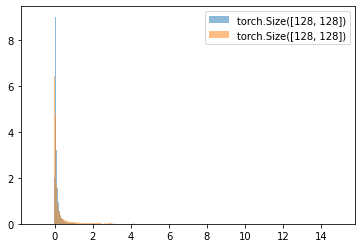

In [7]:

for a,w in zip(svr.adjacency[-3:-1],weights[-4:-2]):
    
    plt.hist(a.flatten().numpy()*(w.shape[0])**0.5,label=str(a.shape),alpha=0.5,bins=300,range=(-1,15),density=True)
    
plt.legend()
plt.show()

In [13]:
print(len(svr.adjacency))

15


In [25]:
for v in rsvr.V:
    print(v.shape)

torch.Size([3, 3, 3, 27])
torch.Size([64, 3, 3, 64])
torch.Size([64, 3, 3, 128])
torch.Size([128, 3, 3, 128])
torch.Size([128, 3, 3, 128])
torch.Size([256, 3, 3, 128])
torch.Size([256, 3, 3, 128])
torch.Size([256, 3, 3, 128])
torch.Size([512, 3, 3, 128])
torch.Size([512, 3, 3, 128])
torch.Size([512, 3, 3, 128])
torch.Size([512, 3, 3, 128])
torch.Size([512, 3, 3, 128])
torch.Size([512, 49, 1, 128])
torch.Size([4096, 128])
torch.Size([4096, 128])


In [49]:
np.log(np.e)

1.0

In [205]:
1-norm.cdf(3)

0.0013498980316301035

512 9
3.0 17.967403 22.821617 12.451171875 0
512 9
3.0 16.559187 23.183758 11.407470703125 0
512 49
7.0 117.20717 195.37213 33.551025390625 0
4096 1
1 25.639957 83.768005 22.808837890625 0
4096 1
1 21.738825 53.69315 28.03955078125 0


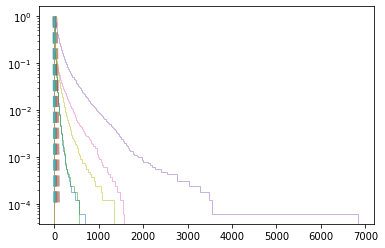

In [199]:
from scipy.stats import chi2,norm

for k in range(10,15):
    a = svr.adjacency[k]
    v = svr.V[k+1]
    n = svr.arch[k+1]
    m = 1/n
    
    if len(v.shape)==2:
        kernel_size = 1
    else: 
        kernel_size = (v.shape[1]*v.shape[2])**0.5
    std = (2*(n-2)/((n+2)*n**2))**0.5/kernel_size
    

    z = int(np.round(kernel_size**2))
    
    p = 0.0001
    pbound = chi2.ppf(1-p,z) #1/n - 2/(z *n)*logp
    
    data = (a).flatten().numpy()
    #dataN = (data-m)/std 
    print(n,z)
    dataN = data*(n*z) 

    plt.hist(dataN,label=str((a.shape))+" "+str(n) ,alpha=0.5,bins=300,density=True,cumulative=-1,histtype='step')
    plt.yscale('log')
    x = np.linspace(chi2.ppf(0.01, z),chi2.ppf(0.9999, z), 100)
    plt.plot(x, 1-chi2.cdf(x, z),'--', lw=3, alpha=0.6, label='chi2 pdf')
    
    #plt.plot(dataN.cumsum())
    print( kernel_size, dataN.mean(),dataN.std(),(dataN>pbound).sum()/len(data)*100,int((data>pbound).sum() ))
    
#plt.legend()
plt.show()

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 1804.39it/s]


5


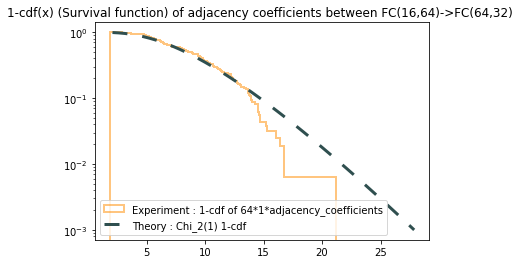

In [226]:
# Agreement chi2-svr en pratique 

c,z = 5,3*3
w1 = torch.randn(c,16,3,3)
w2 = torch.randn(32,c,3,3)
"""
c,z = 64,1
w1 = torch.randn(c,16)
w2 = torch.randn(32,c)
"""
conv_svr = SVR([w1,w2])
print(conv_svr.arch[1])
a = conv_svr.adjacency[0].flatten().numpy()
a_normalized = a*z*c


plt.hist(a_normalized,label="Experiment : 1-cdf of 64*1*adjacency_coefficients",
         alpha=0.5,lw=2,bins=500,density=True,cumulative=-1,histtype='step',color='darkorange')
plt.yscale('log')
x = np.linspace(chi2.ppf(0.01, z),chi2.ppf(0.999, z), 50)
plt.plot(x, 1-chi2.cdf(x, z),linestyle=(0, (5, 5)), lw=3, label='Theory : Chi_2(1) 1-cdf',color='darkslategrey')
plt.legend()
plt.title('1-cdf(x) (Survival function) of adjacency coefficients between FC(16,64)->FC(64,32) ')
plt.show()


In [44]:
#Lab for FC
c = 32
w1 = torch.randn(c,16)
w2 = torch.randn(64,c)

svrOne = SVR([w1,w2])
a = svrOne.adjacency[0]
std = (2*(c-2)/((c+2)*c**2))**0.5
stdApprox = (2)**0.5/c
data = (a**2).flatten().numpy()


print('Experimental :',data.mean(),data.std())
print('Théorique : ',1/c,std,stdApprox )

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 3760.02it/s]

Experimental : 0.031249987 0.04394751
Théorique :  0.03125 0.041513197759691964 0.04419417382415922


In [61]:
#Lab for convolution 
c = 64

w1 = torch.randn(c,16,3,3)
w2 = torch.randn(64,c,3,3)
z = w2.shape[-1]*w2.shape[-2] #9

svrOne = SVR([w1,w2])
a = svrOne.adjacency[0]
data = np.power((a.flatten()).numpy(),2)


stdFC = np.sqrt(2*(c-2)/((c+2)*c**2))
varxz = (2+c)/(z*(c*z+2))*3/(c**2+2*c)-1/(c*z)**2
varxz = 1/(z**2)*3/(c**2+2*c)-1/(c*z)**2
stdy = np.sqrt(z*varxz)
approxStd = np.sqrt(2/z)*1/c



print('Experimental :',data.mean(),data.std())
print('Théorique : ',1/c,stdy,stdFC/z**0.5,approxStd)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 486.07it/s]

Experimental : 0.015624998 0.0073477807
Théorique :  0.015625 0.007196346663622473 0.0071390043421077284 0.00736569563735987


In [54]:
(2+c)/(z*(c*z+2)),1/z**2


(0.0004419602235798778, 0.00041649312786339027)

/tmp/ipykernel_299232/4016190965.py:5: RuntimeWarning:

divide by zero encountered in true_divide



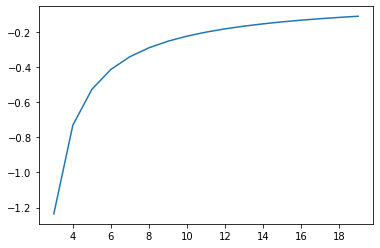

In [158]:
# 
n = np.array(list(range(2,20)))
varReal = np.sqrt(2*(n-2)/((n+2)*n**2))
varApprox = np.sqrt(2)/n
plt.plot(n,(varReal-varApprox)/varReal)


In [247]:
E = torch.tensor([[1,5,6],[6,1,7]])

In [240]:
E.flatten().sort(descending=True)[0][3]

tensor(5)

In [249]:
np.prod(E.shape)


6